In [22]:
import numpy as np
import matplotlib.pyplot as plt
import torch

from depth_estimation.inference import DepthPredictor

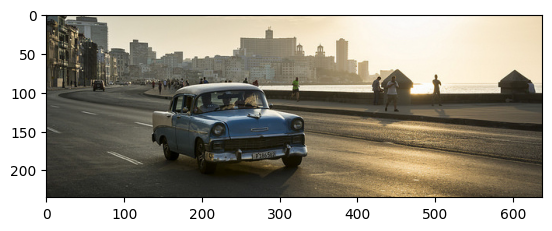

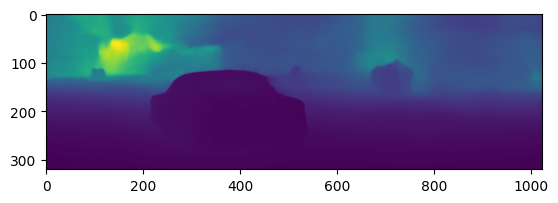

In [23]:
predictor = DepthPredictor()
image = plt.imread('depth_estimation/assets/test_image.jpg')
depth = predictor(image)
plt.imshow(image)
plt.show()
plt.imshow(depth[0, 0, :, :])
plt.show()

In [24]:
depth = predictor(image)

In [21]:
import time
start_time = time.time()
for i in range(1000):
    predictor(image)
end_time = time.time()
print(f'Average inference time is: {(end_time - start_time) / 1000} [sec]')

Average inference time is: 0.9766585826873779 [sec]


In [53]:
import os

from detectron2.engine import DefaultPredictor
from detectron2.data import MetadataCatalog
from detectron2.config import get_cfg as base_config
from detectron2.model_zoo import get_config_file
import VARS
import torch

class FireDetector:
    def __init__(self,
                 weights_path: str or os.PathLike = VARS.TRAINED_FIRE_DETECTOR,
                 ):
        # Load the configuration file
        self.cfg = base_config()
        self.cfg.MODEL.WEIGHTS = weights_path

        # Create the predictor object
        self.predictor = DefaultPredictor(self.cfg)

        # Get the metadata
        self.metadata = MetadataCatalog.get(self.cfg.DATASETS.TEST[0])

    def __call__(self, image):
        with torch.no_grad():
            # Perform inference
            outputs = self.predictor(image)

            # Get the bounding box
            bboxes = []
            print(outputs['instances'])

            # segmentation_mask = outputs['instances']['pred_boxes'].to("cpu").numpy()

            return bboxes

In [54]:
from inference import Detector
import matplotlib.pyplot as plt
image = plt.imread('fire_detection/data/image/Img_18096_input.jpg')
detector = FireDetector()
detector(image)

Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (2, 2048) in the checkpoint but (81, 2048) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (2,) in the checkpoint but (81,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (4, 2048) in the checkpoint but (320, 2048) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (4,) in the checkpoint but (320,) in the model! You might want to double check if this is expected.
Some model parameters or buffers are not found in the checkpoint:
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, we

IndexError: tuple index out of range